In [1]:
import os
import pandas as pd
#import pandas_profiling
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_style('ticks')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### datasets
- pdb_data_seq.csv : https://drive.google.com/file/d/1zzEkV9b7RAOYmKKdkQbzQ4W8jxHIh60P/view?usp=share_link
- pdb_data_no_dups.csv : https://drive.google.com/file/d/1xPdfizGj7-tBvG6fjbnNzUmt5PBCo0xf/view?usp=share_link





In [2]:
#線上直接下載到colab環境
#[安裝]gdown套件:
!pip install --upgrade --no-cache-dir gdown

!gdown -q https://drive.google.com/u/1/uc?id=1zzEkV9b7RAOYmKKdkQbzQ4W8jxHIh60P&export=download
!gdown -q https://drive.google.com/u/1/uc?id=1xPdfizGj7-tBvG6fjbnNzUmt5PBCo0xf&export=download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


### 資料前處理&EDA

In [3]:
# Import Dataset
df_dup = pd.read_csv('pdb_data_no_dups.csv')
df_seq = pd.read_csv('pdb_data_seq.csv')

len(df_dup), len(df_seq)

(141401, 467304)

In [4]:
# Merge the two Data set together
df_merge = pd.read_csv('pdb_data_no_dups.csv').merge(pd.read_csv('pdb_data_seq.csv'), how='inner', on='structureId')
# Drop rows with missing labels
df_merge = df_merge[[type(c) == type('') for c in df_merge.classification.values]]
df_merge = df_merge[[type(c) == type('') for c in df_merge.sequence.values]]
df_merge.reset_index()
df_merge.shape

(471117, 18)

In [5]:
# Merge the two Data set together
#df_merge = df_dup.merge(df_tmp ,how='inner',on='structureId')
df_merge.rename({'macromoleculeType_x':'macromoleculeType',
          'residueCount_y':'residueCount'},axis=1,inplace=True)
df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)

In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471117 entries, 0 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471117 non-null  object 
 1   classification            471117 non-null  object 
 2   experimentalTechnique     471117 non-null  object 
 3   macromoleculeType         435372 non-null  object 
 4   resolution                449467 non-null  float64
 5   structureMolecularWeight  471117 non-null  float64
 6   crystallizationMethod     314748 non-null  object 
 7   crystallizationTempK      317692 non-null  float64
 8   densityMatthews           389640 non-null  float64
 9   densityPercentSol         389762 non-null  float64
 10  pdbxDetails               385462 non-null  object 
 11  phValue                   340691 non-null  float64
 12  publicationYear           413483 non-null  float64
 13  chainId                   471107 non-null  o

In [7]:
df_merge.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20
2,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24


In [8]:
df_isnull = pd.DataFrame(round((df_merge.isnull().sum().sort_values(ascending=False)/df_merge.shape[0])*100,1)).reset_index()
df_isnull.columns = ['Columns', '% of Missing Data']
df_isnull.style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("skyblue", as_cmap=True)
df_isnull = df_isnull.style.background_gradient(cmap=cm)
df_isnull

,Columns,% of Missing Data
0,crystallizationMethod,33.200000
1,crystallizationTempK,32.600000
2,phValue,27.700000
3,pdbxDetails,18.200000
4,densityMatthews,17.300000
5,densityPercentSol,17.300000
6,publicationYear,12.200000
7,macromoleculeType,7.600000
8,resolution,4.600000
9,chainId,0.000000


In [ ]:
# profiling report
#pandas_profiling.ProfileReport(df_merge)

前五大類別: RIBOSOME(12.6%), HYDROLASE(10.2%), TRANSFERASE(8.1%), OXIDOREDUCTASE(7.6%), IMMUNE SYSTEM(3.3%)

wiki-名詞解釋:

- 核糖體(ribosome):舊稱「核糖核蛋白體」或「核蛋白體」，是細胞中的一種胞器，由一大一小兩個次單元結合形成，主要成分是相互纏繞的RNA（稱為「核糖體RNA」，ribosomal RNA，簡稱「rRNA」）和蛋白質（稱為「核糖體蛋白質」，ribosomal protein，簡稱「RP」）。

- 水解酶(Hydrolase):是一種催化化學鍵的水解的酶。

- 轉移酶(Transferase):是一種催化一個分子（稱為供體）的官能團（如甲基或磷酸鹽團）轉移至另一個分子（稱為受體）的酶。

- 氧化還原酶(Oxidoreductase):是一種催化電子由一個分子傳送往另一個分子的酶。

- 免疫系統(Immune system):是生物體體內一系列的生物學結構和進程所組成的疾病防禦系統。

In [9]:
class_list = ['RIBOSOME','HYDROLASE','TRANSFERASE','OXIDOREDUCTASE','IMMUNE SYSTEM']
class_1 = df_merge.classification =='RIBOSOME'
class_2 = df_merge.classification =='HYDROLASE'
class_3 = df_merge.classification =='TRANSFERASE'
class_4 = df_merge.classification =='OXIDOREDUCTASE'
class_5 = df_merge.classification =='IMMUNE SYSTEM'

In [10]:
df_class_cnt = pd.DataFrame(columns = ['class','F','T','R'])
for i in range(len(class_list)):
    class_data = (df_merge.classification ==class_list[i]).value_counts()
    df_class_cnt.loc[i] = [class_list[i], class_data[0], class_data[1], 
                           round(class_data[1]/(class_data[0]+class_data[1]), 4)]

In [11]:
df_class_cnt

,class,F,T,R
0,RIBOSOME,410407,60710,0.1289
1,HYDROLASE,423284,47833,0.1015
2,TRANSFERASE,433391,37726,0.0801
3,OXIDOREDUCTASE,436004,35113,0.0745
4,IMMUNE SYSTEM,455128,15989,0.0339


In [12]:
#前五大類合計筆數, 佔全部資料比率
df_merge_sub = df_merge[class_1 + class_2 + class_3 + class_4 + class_5]
df_merge_sub = df_merge_sub.reset_index(drop=True)
len(df_merge_sub),  round(len(df_merge_sub) / len(df_merge), 4)

(197371, 0.4189)

In [13]:
df_merge_sub['cnt'] = 1
df_merge_sub.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount,cnt
0,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,1
1,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,1
2,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,1


***

### 建立模型(ML model)

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 使用n-gram取特徵

- ngram_range: tuple (min_n, max_n), default=(1, 1)

In [18]:
# Make a prediction dictionary to store accuracys
prediction = dict()

#### ngram_range:(2,2)

In [24]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (2,2))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yc', 'yd', 'ye', 'yf', 'yg', 'yh', 'yi', 'yk', 'yl', 'ym', 'yn', 'yp', 'yq', 'yr', 'ys', 'yt', 'yv', 'yw', 'yx', 'yy']


In [25]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["2-2"] = accuracy_score(NB_pred, y_test)
print( prediction['2-2'])

0.4092463584547182


#### ngram_range:(3,3)

In [15]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (3,3))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyc', 'yyd', 'yye', 'yyf', 'yyg', 'yyh', 'yyi', 'yyk', 'yyl', 'yym', 'yyn', 'yyp', 'yyq', 'yyr', 'yys', 'yyt', 'yyv', 'yyw', 'yyx', 'yyy']


In [19]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["3-3"] = accuracy_score(NB_pred, y_test)
print( prediction['3-3'])

0.591564281190627


#### ngram_range:(4,4)

In [22]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyya', 'yyyc', 'yyyd', 'yyye', 'yyyf', 'yyyg', 'yyyh', 'yyyi', 'yyyk', 'yyyl', 'yyym', 'yyyn', 'yyyp', 'yyyq', 'yyyr', 'yyys', 'yyyt', 'yyyv', 'yyyw', 'yyyy']


In [23]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["4-4"] = accuracy_score(NB_pred, y_test)
print( prediction['4-4'])

0.9159721342621913


#### ngram_range:(5,5)

In [26]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (5,5))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyytq', 'yyyvd', 'yyyvg', 'yyyvk', 'yyyvl', 'yyyvn', 'yyyvt', 'yyyvv', 'yyywy', 'yyyyd', 'yyyyg', 'yyyyh', 'yyyyl', 'yyyym', 'yyyyp', 'yyyyr', 'yyyys', 'yyyyt', 'yyyyv', 'yyyyy']


In [27]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["5-5"] = accuracy_score(NB_pred, y_test)
print( prediction['5-5'])

0.9721089297023433


#### ngram_range:(6,6)

In [29]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (6,6))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyyvtl', 'yyyvvs', 'yyywyl', 'yyyydf', 'yyyygl', 'yyyygm', 'yyyyhr', 'yyyyll', 'yyyyma', 'yyyymd', 'yyyypf', 'yyyyrg', 'yyyyry', 'yyyysa', 'yyyysg', 'yyyytl', 'yyyyvk', 'yyyyyg', 'yyyyym', 'yyyyyy']


In [30]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["6-6"] = accuracy_score(NB_pred, y_test)
print( prediction['6-6'])

0.962761241291957


#### ngram_range:(7,7)

In [33]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (7,7))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyyvvsa', 'yyywylt', 'yyyydfy', 'yyyygld', 'yyyygmd', 'yyyyhre', 'yyyylle', 'yyyymav', 'yyyymdv', 'yyyypft', 'yyyyrgc', 'yyyyryg', 'yyyysan', 'yyyysgm', 'yyyytlt', 'yyyyvkk', 'yyyyygm', 'yyyyymd', 'yyyyyyg', 'yyyyyym']


In [34]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["7-7"] = accuracy_score(NB_pred, y_test)
print( prediction['7-7'])

0.9649905003166561


#### ngram_range:(8,8)

In [37]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (8,8))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyyvvsav', 'yyywyltn', 'yyyydfyd', 'yyyygldv', 'yyyygmdv', 'yyyyhref', 'yyyyllel', 'yyyymavw', 'yyyymdvw', 'yyyypftf', 'yyyyrgcp', 'yyyyrygl', 'yyyysane', 'yyyysgmd', 'yyyytlte', 'yyyyvkkd', 'yyyyygmd', 'yyyyymdv', 'yyyyyygm', 'yyyyyymd']


In [38]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["8-8"] = accuracy_score(NB_pred, y_test)
print( prediction['8-8'])

0.9631158961367955


### 特徵評估

In [55]:
#prediction
df_pred = pd.DataFrame(prediction, index=[0])
df_pred

,3-3,4-4,2-2,5-5,6-6,7-7,8-8
0,0.591564,0.915972,0.409246,0.972109,0.962761,0.964991,0.963116


In [56]:
#欄位依名稱排序
df_pred = df_pred.reindex(sorted(df_pred.columns), axis=1)
df_pred

,2-2,3-3,4-4,5-5,6-6,7-7,8-8
0,0.409246,0.591564,0.915972,0.972109,0.962761,0.964991,0.963116


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [66]:
df_pred[0:1].values[0]

array([0.40924636, 0.59156428, 0.91597213, 0.97210893, 0.96276124,
       0.9649905 , 0.9631159 ])

In [60]:
df_pred.columns.values

array(['2-2', '3-3', '4-4', '5-5', '6-6', '7-7', '8-8'], dtype=object)

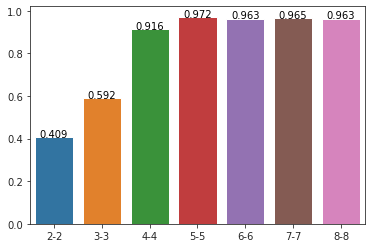

In [82]:
barchart = sns.barplot(x=df_pred.columns.values, y=df_pred[0:1].values[0])

x_idx =0
for col in df_pred.columns.values:
  show_value = round(df_pred[col][0],3)
  barchart.text(x_idx, show_value, show_value, color='black', ha='center')
  x_idx+=1

### 儲存評估結果

In [83]:
df_pred.to_csv("n-gram-analysis.csv")